In [1]:
# 6. Modeling Transformations

from pytransform3d.transformations import concat
A2B = ...  # transformation from frame A to frame B
B2C = ...  # transformation from frame B to frame C
A2C = concat(A2B, B2C)

TypeError: float() argument must be a string or a number, not 'ellipsis'

In [2]:
from pytransform3d.transformations import vector_to_point, transform
p_in_A = vector_to_point(...)  # point in frame A
p_in_C = transform(A2C, p_in_A)

NameError: name 'A2C' is not defined

In [4]:
from pytransform3d.editor import TransformEditor
from pytransform3d.rotations import active_matrix_from_extrinsic_euler_xyx
from pytransform3d.transform_manager import TransformManager
from pytransform3d.transformations import transform_from

tm = TransformManager()

tm.add_transform(
    "tree",
    "world",
    transform_from(
        active_matrix_from_extrinsic_euler_xyx([0, 0.5, 0]), [0, 0, 0.5]
    ),
)
tm.add_transform(
    "car",
    "world",
    transform_from(
        active_matrix_from_extrinsic_euler_xyx([0.5, 0, 0]), [0.5, 0, 0]
    ),
)

te = TransformEditor(tm, "world", s=0.3)
te.show()
print("tree to world:")
print(te.transform_manager.get_transform("tree", "world"))

/tmp/ipykernel_27171/1563181177.py:12: DeprecationWarning: function is deprecated, use matrix_from_euler
  active_matrix_from_extrinsic_euler_xyx([0, 0.5, 0]), [0, 0, 0.5]
/tmp/ipykernel_27171/1563181177.py:19: DeprecationWarning: function is deprecated, use matrix_from_euler
  active_matrix_from_extrinsic_euler_xyx([0.5, 0, 0]), [0.5, 0, 0]


TypeError: 'NoneType' object is not callable

/tmp/ipykernel_27171/14834086.py:17: DeprecationWarning: function is deprecated, use matrix_from_euler
  pr.active_matrix_from_intrinsic_euler_xyz(np.array([0.0, 0.0, -0.5])),


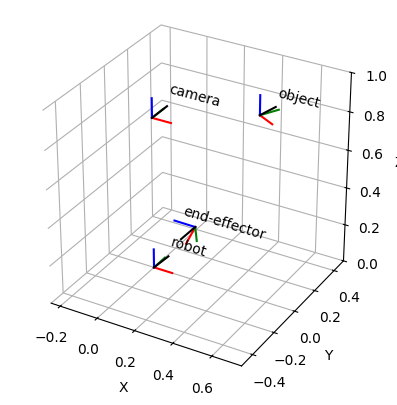

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from pytransform3d import rotations as pr
from pytransform3d import transformations as pt
from pytransform3d.transform_manager import TransformManager

rng = np.random.default_rng(1)

ee2robot = pt.transform_from_pq(
    np.hstack((np.array([0.4, -0.3, 0.5]), pr.random_quaternion(rng)))
)
cam2robot = pt.transform_from_pq(
    np.hstack((np.array([0.0, 0.0, 0.8]), pr.q_id))
)
object2cam = pt.transform_from(
    pr.active_matrix_from_intrinsic_euler_xyz(np.array([0.0, 0.0, -0.5])),
    np.array([0.5, 0.1, 0.1]),
)

tm = TransformManager()
tm.add_transform("end-effector", "robot", ee2robot)
tm.add_transform("camera", "robot", cam2robot)
tm.add_transform("object", "camera", object2cam)

ee2object = tm.get_transform("end-effector", "object")

ax = tm.plot_frames_in("robot", s=0.1)
ax.set_xlim((-0.25, 0.75))
ax.set_ylim((-0.5, 0.5))
ax.set_zlim((0.0, 1.0))
plt.show()